In [3]:
import tensorflow
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [4]:
(x_train,y_train),(x_test,y_test ) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


* CIFAR-10 is a well-known dataset in the field of machine learning and computer vision. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
* The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.
* Here are some links where you can find more information about CIFAR-10:

CIFAR-10 dataset homepage: https://www.cs.toronto.edu/~kriz/cifar.html


CIFAR-10 on Kaggle: https://www.kaggle.com/c/cifar-10

In [ ]:
# The code is checking and printing the shapes of the training and testing datasets along with their labels to ensure
# they are compatible for training a machine learning model.
print('X_train shape..',x_train.shape)
print('X_tes shape..',x_test.shape)
print('y_train shape..',y_train.shape)
print('y_test shape..',y_test.shape)

X_train shape.. (50000, 32, 32, 3)
X_tes shape.. (10000, 32, 32, 3)
y_train shape.. (50000, 1)
y_test shape.. (10000, 1)


In [ ]:
y_train[0],x_train[0]

(array([6], dtype=uint8),
 array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
  

In [ ]:
print(y_test)
print(y_train)


[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[6 9 9 ... 9 1 1]


* The dimension of Y_test is in 2d So we nee to conver them into 1D


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape,y_test.shape # thus Successfully converted the dimension

((50000,), (10000,))

In [6]:
class_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_list)


['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


* Let's View some Images from the datasets

46030


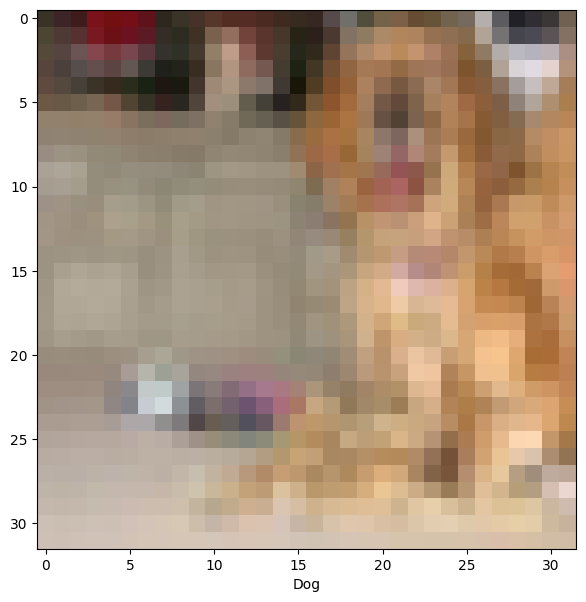

In [ ]:
def images():
  x,y= x_train,y_train
  index = random.randint(0,len(x_train))
  print(index)
  plt.figure(figsize =(12,7))
  plt.imshow(x[index])
  plt.xlabel(class_list[y[index]])
  plt.show()

images()

38998


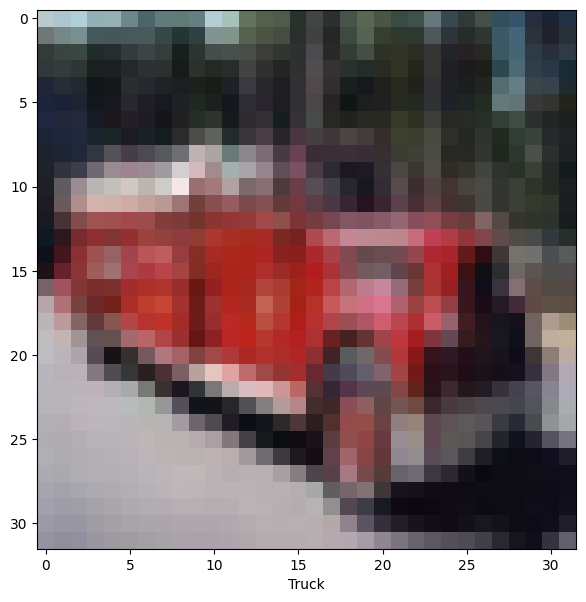

In [ ]:
images()

* Red Optimus

* In the CIFAR-10 dataset, the pixel values for the RGB colors are typically in the range of 0 to 255. To normalize these pixel values to the range of 0 to 1, you can simply divide the pixel values by 255.

* Here is the professional way to normalize the pixel values in Python using NumPy:

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train/255.0

* By dividing the pixel values by 255, you are effectively scaling the values to be between 0 and 1, which is a common preprocessing step in machine learning tasks, especially for image datasets like CIFAR-10.

In [ ]:
print('X_train shape..',x_train.shape)
print('X_tes shape..',x_test.shape)
print('y_train shape..',y_train.shape)
print('y_test shape..',y_test.shape)

X_train shape.. (50000, 32, 32, 3)
X_tes shape.. (10000, 32, 32, 3)
y_train shape.. (50000,)
y_test shape.. (10000,)


# Creaing a NN

In [10]:
NN = Sequential([
    MaxPooling2D((2,2)),
    Flatten(input_shape = (32,32,3)),
    Dense(units= 3000,activation = 'relu',  ),
    Dense(units = 1000,activation = 'relu'),
    Dense(units = 10,activation  ='softmax')

])


- Input layer: Flattens the input images with shape (32, 32, 3) into a 1D array.
- Hidden layers: Two dense layers with 3000 and 1000 neurons, respectively, using ReLU activation function.
- Output layer: Dense layer with 10 neurons and softmax activation for multi-class classification.

In summary, the model takes flattened 32x32 RGB images as input, processes them through two hidden layers with ReLU activation, and outputs class probabilities for 10 classes using a softmax activation function.

In [13]:
NN.compile(optimizer = 'SGD',loss= 'sparse_categorical_crossentropy',metrics =['accuracy'])

ADAM
* For multi-class classification tasks, a common choice of optimizer is the Adam optimizer. Adam is an adaptive learning rate optimization algorithm that is well-suited for a wide range of deep learning tasks, including multi-class classification. It is known for its efficiency in terms of convergence speed and generalization performance.

categorical_crossentropy
* For multi-class image classification tasks with 10 classes, a common choice of loss function is the categorical cross-entropy loss function. This loss function is well-suited for scenarios where each input sample belongs to one and only one class (i.e., mutually exclusive classes).

The categorical cross-entropy loss function is used to measure the difference between the true class labels and the predicted class probabilities output by the model. It encourages the model to assign high probabilities to the correct class while penalizing incorrect predictions.

I

$$
L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$

where:
- $N$ is the number of samples
- $C$ is the number of classes
- $y_{ij}$ is the true probability distribution (one-hot encoded) for sample $i$ and class $j$
- $\hat{y}_{ij}$ is the predicted probability for sample $i$ and class $j$

Therefore, for multi-class image classification with 10 classes, you can use the categorical cross-entropy loss function to train your model.

In [16]:
NN.fit(x_train,y_train,epochs =4)## Training the NN Model

Epoch 1/4
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2804e-04 - accuracy: 0.1000
Epoch 2/4
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0993e-04 - accuracy: 0.1000
Epoch 3/4
1563/1563 [==============================] - 75s 48ms/step - loss: 9.6536e-05 - accuracy: 0.1000
Epoch 4/4
1563/1563 [==============================] - 80s 51ms/step - loss: 8.6221e-05 - accuracy: 0.1000



* If you Want to scale the time and data ,you could add the MaxPooling layes or Average Pooling Layers

In [17]:
NN.evaluate(x_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 18.8846 - accuracy: 0.1000


[18.884563446044922, 0.10000000149011612]

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_pred =NN.predict(x_test)
y_pred_class = [np.argmax(i) for i in y_pred]
print("Classification Report /n",classification_report(y_test,y_pred_class))

313/313 [==============================] - 5s 16ms/step
Classification Report /n               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*  y_pred_class = [np.argmax(i) for i in y_pred]
- This line of code creates a new list y_pred_class by iterating over each prediction array i in y_pred and finding the index of the maximum value using np.argmax(). This index represents the predicted class for each input data point in x_test. The list y_pred_class will contain the predicted classes for all the input data points.

# Creating a CNN

In [8]:
cnn = Sequential([
    Conv2D(filters =32,input_shape = (32,32,3),activation ='relu',kernel_size =(3,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters = 64,kernel_size =(3,3),activation ='relu'),
    MaxPooling2D((2,2)),    # pooling helps to reduce the size and imporve the quality  of the Image...types 'Maxpooling,Averagpooling..
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

In [9]:
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 53s 33ms/step - loss: 0.0069 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 9.3074e-08 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 7.4266e-08 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 4.4065e-08 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9194e-08 - accuracy: 0.1000


In [11]:
evaluation =cnn.evaluate(x_test,y_test)
print("LOSS>>",evaluation[0])
print("Accuracy",evaluation[1])

LOSS>> 62.63806915283203
Accuracy 0.10000000149011612


* Evaluating the MOdel Accuracy to understand it's Performance and Prediction Correctness

In [13]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[9.99999940e-01, 1.43798021e-22, 2.41503257e-32, 7.44246437e-30,
        5.39505278e-29, 1.05022885e-36, 2.99513595e-28, 2.71168647e-21,
        1.08280009e-25, 0.00000000e+00],
       [9.99999940e-01, 2.28269402e-28, 0.00000000e+00, 3.24364250e-37,
        3.41174213e-36, 0.00000000e+00, 1.98127363e-35, 1.13855378e-26,
        3.52965013e-32, 0.00000000e+00],
       [9.99999940e-01, 1.40534264e-25, 1.12747057e-36, 1.04549368e-33,
        9.52808848e-33, 0.00000000e+00, 3.65519351e-32, 4.95801130e-24,
        4.52955792e-29, 0.00000000e+00],
       [9.99999940e-01, 3.32028734e-28, 0.00000000e+00, 2.64344821e-37,
        3.05416198e-36, 0.00000000e+00, 2.30576446e-35, 1.60129381e-26,
        4.68409696e-32, 0.00000000e+00],
       [9.99999940e-01, 1.37115779e-21, 3.85393158e-31, 1.14164481e-28,
        8.12911726e-28, 2.87904338e-35, 4.35429303e-27, 2.47205446e-20,
        1.49820177e-24, 0.00000000e+00]], dtype=float32)

In [16]:
class_list


['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

In [ ]:
y_pred_class= [np.argmax(i) for i in y_pred]
y_pred_class

Text(0.5, 0, 'Airplane')

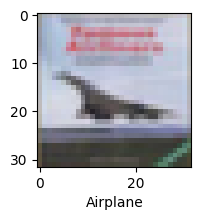

In [23]:
plt.figure(figsize = (15,2))
plt.imshow(x_test[3])
plt.xlabel(class_list[y_pred_class[3]])

3609


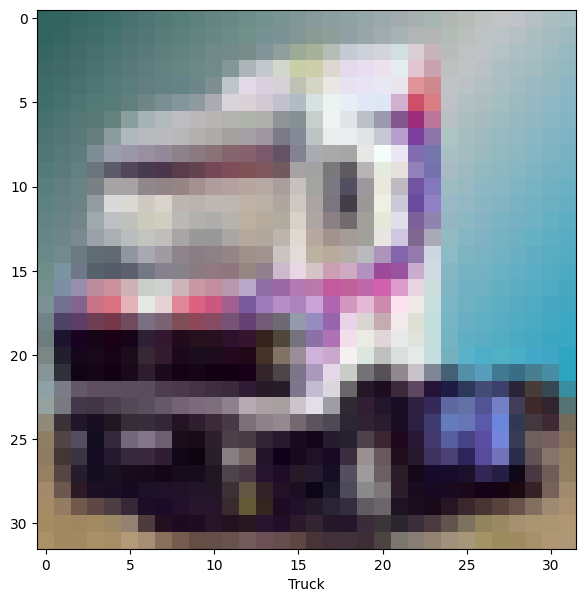

In [31]:
def images():
  x,y= x_test,y_pred_class # ploting the testing vs predicted Result
  index = random.randint(0,len(x_test))
  print(index)
  plt.figure(figsize =(12,7))
  plt.imshow(x[index])
  plt.xlabel(class_list[y[index]])
  plt.show()

images()

* Thus  we Successfully got our Optimus But in a blur image ,we DO some techniques like optimizers ot  make the image clear ,which we  will be seeing in the next project

6288


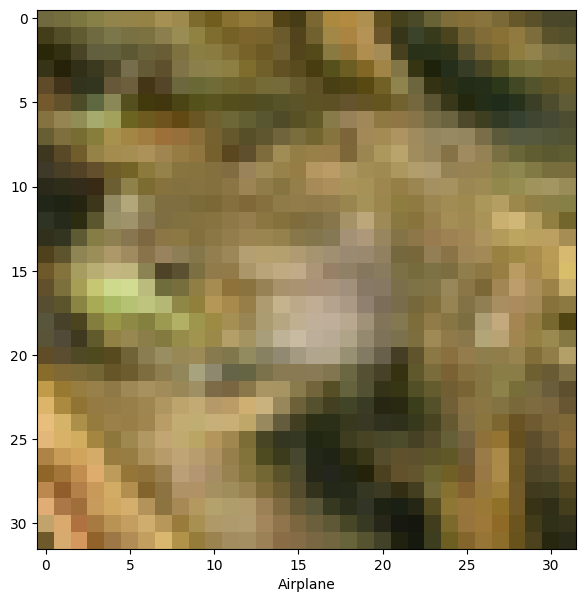

In [33]:
images()
